In [4]:
!pip install fredapi
!pip install yellowbrick

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
import pylab 
import numpy as np
from sklearn.externals import joblib 
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [9]:
from fredapi import Fred
fred = Fred(api_key='c351789db598f69b8d4c64574d1cf1da')

In [10]:
from yellowbrick.regressor import CooksDistance
import pandas as pd
import numpy as np

In [11]:
df={}
df['TY10'] = fred.get_series('DGS10')
df['FED']= fred.get_series('FEDFUNDS')
df['SHEET']=fred.get_series('WALCL')
df['BUND10']=fred.get_series('IRLTLT01DEM156N')
df['UNP']=fred.get_series('UNRATE')
df['SPX']=fred.get_series('SP500')
df['WTI']=fred.get_series('DCOILWTICO')
df['GDPE']=fred.get_series('GDPC1')
df['PCEEUU']=fred.get_series('PCEPILFE')
df['CPIGER']=fred.get_series('DEUCPIALLMINMEI')
df['RETAIL']=fred.get_series('RRSFS')
df['GOODS']=fred.get_series('DGORDER')
df['MANUF']=fred.get_series('IPMAN')
df['INVENT']=fred.get_series('BUSINV')
df['GDPP']=fred.get_series('A191RL1Q225SBEA')
df['INDPP']=fred.get_series('INDPRO')
df['NONFARM']=fred.get_series('PAYEMS')
df['TBILL3']=fred.get_series('DTB3')
df['M2']=fred.get_series('M2')
df['GDPGER']=fred.get_series('CPMNACSCAB1GQDE')
df['M1']=fred.get_series('M1')
df['VIX']=fred.get_series('VIXCLS')
df['COMERLOAN']=fred.get_series('TOTCI')
df['TOTALASSETBANK']=fred.get_series('TLAACBW027SBOG')
df['CHIFEDCONDIT']=fred.get_series('NFCI')
df['CHIFEDACT']=fred.get_series('CFNAI')
df['CONSUSENT']=fred.get_series('UMCSENT')
df['TY2']= fred.get_series('DGS2')
df = pd.DataFrame(df)

In [12]:
df=df.fillna(method="ffill")
df=df.dropna()

In [13]:
X=np.array(df.drop('TY10',axis=1))
y=np.array(df['TY10'])

C:\Users\gregorio.diaz\Anaconda3\envs\spyder\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\Users\gregorio.diaz\Anaconda3\envs\spyder\lib\site-packages\yellowbrick\regressor\influence.py:182: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  _, _, baseline = self.ax.stem(


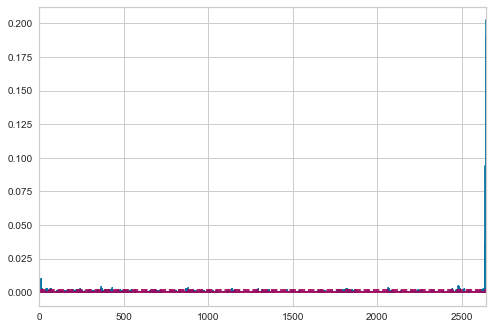

In [14]:
visualizer=CooksDistance()
visualizer.fit(X,y)
df["distancia"]=visualizer.distance_

In [16]:
df_cleaned=df[df["distancia"]<0.0015]
X=np.array(df_cleaned.drop('TY10',axis=1))
y=np.array(df_cleaned['TY10'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
seleccionadas=SelectKBest(f_classif,k=7).fit(X,y)
atributos=seleccionadas.get_support()
df_cleaned.drop('TY10',axis=1).columns[atributos]

Index(['SHEET', 'BUND10', 'UNP', 'MANUF', 'INVENT', 'INDPP', 'M1'], dtype='object')

In [19]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.feature_importances_

array([0.0776877 , 0.03506599, 0.44406758, 0.00903174, 0.00420275,
       0.00589963, 0.00204419, 0.00557146, 0.00504565, 0.00977689,
       0.00460401, 0.00529444, 0.00282663, 0.0039125 , 0.01436375,
       0.003617  , 0.00365863, 0.01770303, 0.00160161, 0.00417892,
       0.00396978, 0.00967056, 0.01109757, 0.00654151, 0.00233868,
       0.00458633, 0.29776189, 0.00387958])

In [20]:
important=pd.DataFrame()
important["variable"]=list(df_cleaned.drop('TY10',axis=1).columns)
important["Importancia"]=list(rf.feature_importances_)
Cols=list(important.nlargest(7,"Importancia")['variable'])
Cols

['BUND10', 'TY2', 'FED', 'SHEET', 'M2', 'INDPP', 'TOTALASSETBANK']

In [25]:
r2_score(y_test,rf.predict(X_test))

0.9941310360244467

In [31]:
df_cleaned.corr()

,TY10,FED,SHEET,BUND10,UNP,SPX,WTI,GDPE,PCEEUU,CPIGER,...,GDPGER,M1,VIX,COMERLOAN,TOTALASSETBANK,CHIFEDCONDIT,CHIFEDACT,CONSUSENT,TY2,distancia
TY10,1.000000,0.101625,-0.199320,0.508733,0.202210,-0.094590,0.296783,-0.158284,-0.181560,-0.206156,...,-0.159002,-0.222157,0.054921,-0.211892,-0.203060,-0.013545,0.253511,-0.130419,0.288943,0.015108
FED,0.101625,1.000000,0.327365,-0.613249,-0.722220,0.830080,-0.439530,0.849626,0.836317,0.809309,...,0.842128,0.779470,-0.177055,0.784902,0.752263,-0.551828,0.021367,0.651761,0.934374,-0.016619
SHEET,-0.199320,0.327365,1.000000,-0.802680,-0.869474,0.742242,-0.634665,0.739627,0.752013,0.744041,...,0.751633,0.810687,-0.472160,0.801539,0.841320,-0.802151,0.091075,0.820374,0.420084,-0.086747
BUND10,0.508733,-0.613249,-0.802680,1.000000,0.928691,-0.857460,0.753262,-0.898014,-0.903992,-0.889992,...,-0.893223,-0.925572,0.382853,-0.933043,-0.928350,0.698013,0.064753,-0.858690,-0.564174,0.041158
UNP,0.202210,-0.722220,-0.869474,0.928691,1.000000,-0.956471,0.718580,-0.970383,-0.973517,-0.955716,...,-0.972990,-0.987725,0.445108,-0.987000,-0.993117,0.837058,-0.036930,-0.936116,-0.736817,0.059951
SPX,-0.094590,0.830080,0.742242,-0.857460,-0.956471,1.000000,-0.611421,0.984645,0.984285,0.971177,...,0.981923,0.974060,-0.459368,0.964944,0.971689,-0.833918,0.044592,0.895534,0.815753,-0.035739
WTI,0.296783,-0.439530,-0.634665,0.753262,0.718580,-0.611421,1.000000,-0.682143,-0.652609,-0.559754,...,-0.678802,-0.677565,0.115124,-0.736516,-0.720211,0.394387,0.093363,-0.717787,-0.492910,0.039376
GDPE,-0.158284,0.849626,0.739627,-0.898014,-0.970383,0.984645,-0.682143,1.000000,0.996142,0.972731,...,0.996567,0.985778,-0.384423,0.987935,0.983423,-0.784660,0.015333,0.896596,0.827302,-0.043689
PCEEUU,-0.181560,0.836317,0.752013,-0.903992,-0.973517,0.984285,-0.652609,0.996142,1.000000,0.984460,...,0.996170,0.992515,-0.404316,0.988259,0.984786,-0.803768,0.023332,0.892967,0.806453,-0.043008
CPIGER,-0.206156,0.809309,0.744041,-0.889992,-0.955716,0.971177,-0.559754,0.972731,0.984460,1.000000,...,0.972343,0.977653,-0.445487,0.962945,0.962594,-0.831861,0.021888,0.866718,0.757554,-0.048569


In [26]:
import matplotlib.pyplot as plt

0.9941310360244467


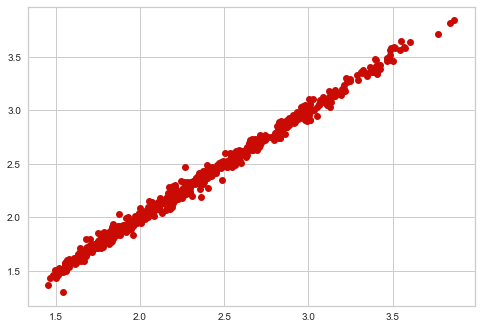

In [27]:
plt.plot(rf.predict(X_test),y_test,'ro')
print(r2_score(y_test,rf.predict(X_test)))

### Se hará regresión con todas las columnas iniciales y luego con las variables seleccionadas despues del feature engineer

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [91]:
X1=np.array(df_cleaned.drop('TY10',axis=1))
y1=np.array(df_cleaned['TY10'])
X2=np.array(df_cleaned[Cols])
y2=np.array(df_cleaned['TY10'])

In [96]:
lr=RandomForestRegressor()
lr2=RandomForestRegressor()
lr.fit(X1,y1)
lr2.fit(X2,y2)

C:\Users\CNVBOT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\CNVBOT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [97]:
mean_squared_error(y1,lr.predict(X1))

0.0003149082240762812

In [98]:
mean_squared_error(y2,lr2.predict(X2))

0.00040787279796695894

In [99]:
normal=pd.DataFrame()
normal['real']=y1
normal['estimado']=lr.predict(X1)
normal[-10:]

,real,estimado
2507,1.57,1.585
2508,1.54,1.573
2509,1.61,1.620
2510,1.66,1.631
2511,1.65,1.628
2512,1.59,1.608
2513,1.56,1.572
2514,1.59,1.597
2515,1.62,1.619
2516,1.61,1.612


In [100]:
normal_cleanded=pd.DataFrame()
normal_cleanded['real']=y2
normal_cleanded['estimado']=lr2.predict(X2)
normal_cleanded[-10:]

,real,estimado
2507,1.57,1.57700
2508,1.54,1.55600
2509,1.61,1.58900
2510,1.66,1.64900
2511,1.65,1.64900
2512,1.59,1.58700
2513,1.56,1.56400
2514,1.59,1.58700
2515,1.62,1.61625
2516,1.61,1.61625


#### Se reduce el número de variables y el error aumenta muy poco. Es mucho más eficiente que tener todas las variables

In [101]:
lr=LinearRegression()
lr2=LinearRegression()
lr.fit(X1,y1)
lr2.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
mean_squared_error(y1,lr.predict(X1))

0.008908617914623128

In [103]:
mean_squared_error(y2,lr2.predict(X2))

0.025181985995810334

In [104]:
normal=pd.DataFrame()
normal['real']=y1
normal['estimado']=lr.predict(X1)
normal[-10:]

,real,estimado
2507,1.57,1.798318
2508,1.54,1.652031
2509,1.61,1.681879
2510,1.66,1.717424
2511,1.65,1.720386
2512,1.59,1.714121
2513,1.56,1.758251
2514,1.59,1.790709
2515,1.62,1.821019
2516,1.61,1.815576


In [105]:
normal_cleanded=pd.DataFrame()
normal_cleanded['real']=y2
normal_cleanded['estimado']=lr2.predict(X2)
normal_cleanded[-10:]

,real,estimado
2507,1.57,1.732946
2508,1.54,1.705734
2509,1.61,1.731560
2510,1.66,1.753529
2511,1.65,1.753529
2512,1.59,1.738034
2513,1.56,1.717372
2514,1.59,1.738034
2515,1.62,1.760720
2516,1.61,1.760720
